In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
iris_dataset = load_iris()

In [3]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print("keys of iris_dataset: \n{}".format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
df = pd.DataFrame(iris_dataset['data'])

In [6]:
df2 = pd.DataFrame(iris_dataset['target'])

In [7]:
print(iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [8]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:
print("feature names: {}".format(iris_dataset['feature_names']))

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [11]:
df.rename(columns={0:'sepal length (cm)', 1: 'sepal width (cm)',2: 'petal length (cm)', 3:'petal width (cm)'}, inplace=True)

In [12]:
df2.rename(columns={0:'Target'}, inplace=True)

In [13]:
conc = pd.concat([df,df2], axis=1)

In [14]:
# EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sepal length (cm)'>

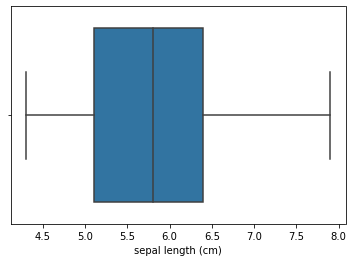

In [16]:
sns.boxplot(x='sepal length (cm)', data=conc)

In [17]:
cols = list(conc.columns)

In [18]:
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'Target']

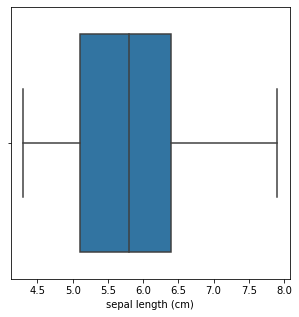

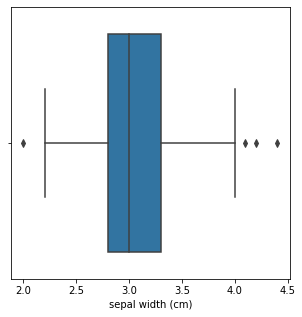

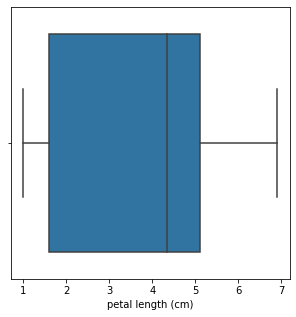

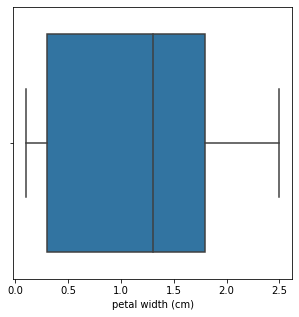

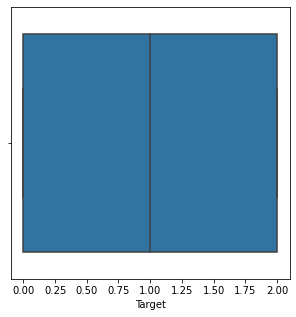

In [19]:
for i in cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=i, data=conc)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

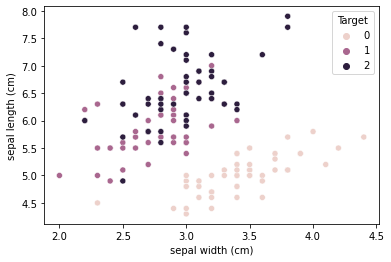

In [20]:
sns.scatterplot(y='sepal length (cm)',x = 'sepal width (cm)',hue='Target',data=conc)

<AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>

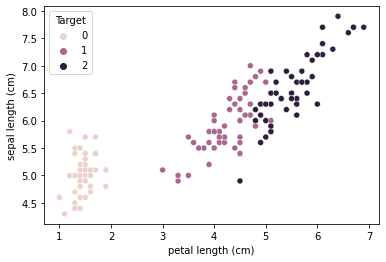

In [21]:
sns.scatterplot(y='sepal length (cm)',x = 'petal length (cm)',hue='Target',data=conc)

<AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>

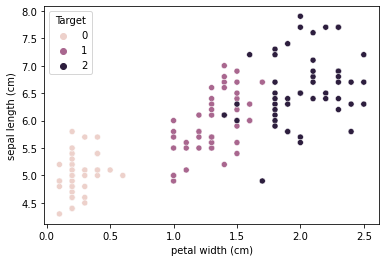

In [22]:
sns.scatterplot(y='sepal length (cm)',x = 'petal width (cm)',hue='Target',data=conc)

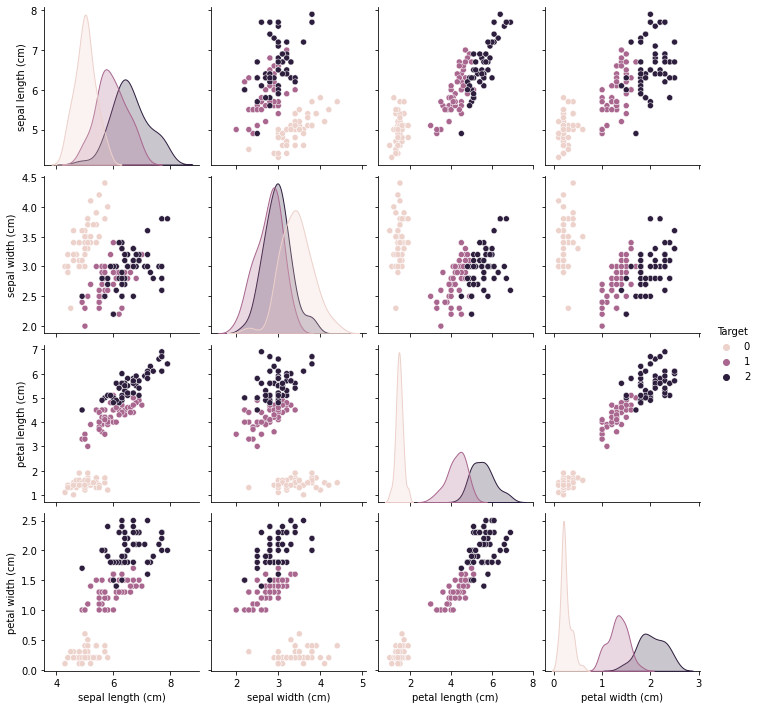

In [23]:
sns.pairplot(conc, hue='Target')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = conc.drop(columns=['Target'])
y = conc[['Target']]

In [26]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train, y_train)

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [32]:
X_new = np.array([[5,2.9,1,0.2]])

In [33]:
prediction = knn.predict(X_new)

In [34]:
print("Prediction: {}".format(prediction))
print("Predicted target names: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target names: ['setosa']


In [35]:
y_pred = knn.predict(X_test)

In [36]:
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [38]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00
